# Assignment 6: FODO & Twiss Parameter
<html>
<div class="alert alert-info" role="alert" style="margin-top: 10px">
In this exercise we study the FODO cell in more detail.
<ul>
    <li>Implement the FODO cell map</li>
    <li>Single Particle tracking</li>
    <li>Twiss parameter tracking</li>
</ul>
</div>
</html>

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>If you use google colab, run this cell:</strong>
    </div>
</html>

In [1]:
# for google colab, run this cell
!git clone https://github.com/potato18z/pam1-hs2021.git
import sys
sys.path.append('./pam1-hs2021')

fatal: destination path 'pam1-hs2021' already exists and is not an empty directory.


<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
<strong>If you run it locally, run</strong>
               </div>
</html>

```bash
$ cd .../pam1-hs2021
...pam1-hs2021$ git pull
```
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
to get the updated repository.</div></html>

As always, we need to set up the general simulation specifications first.
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ol>
            <li>create a proton particle</li>
            <li>set the kinetic energy to 100 MeV</li>
            <li>set all global variables</li>
        </ol>
    </div>
</html>

In [2]:
from AcceLEGOrator import Proton, Physics, Constants
import AcceLEGOrator.Parameter as param

particle = Proton()

ekin    = 100 #MeV
param.mass    = particle.mass # MeV / c^2
param.charge  = particle.charge # e
param.gamma_0 = Physics.getGamma(ekin, particle.mass)
print ( 'Gamma = ', param.gamma_0)

Gamma =  1.1065788924789453


## Thin Quadrupole and FODO Map
As part of solution of the previous exercise, the implementation of thin length quadrupole map is given. You can use it directly by importing.

In [3]:
from AcceLEGOrator import Map, ThinQuadrupole, Drift

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Implement the FODO map according to lecture 6-1, equation 6.</li>
        </ul>
    </div>
</html>

In [4]:
from AcceLEGOrator import Drift

class FODO(Map):
    
    def __init__(self, length, f):
        # TODO
        self.f = f
        
        RQ1 = ThinQuadrupole(2.0 * f)
        RD  = Drift(length)
        RQ2 = ThinQuadrupole(-f)
        
        R = RQ1 * RD * RQ2 * RD * RQ1
        
        super(FODO, self).__init__(R, 2*length) # a fodo cell actually has 2*drift length
        
    def __str__(self):
        return 'FODO(L = ' + str(self.length) \
               + ' [m], f = ' + str(self.f) + ' )\n'
    
    def get(self, length):
        return FODO(length, self.f)

## Single Particle tracking

After defining the FODO map, we track a single particle
$$
\begin{pmatrix}
x \\ p_x \\ y \\ p_y \\ z \\ \delta
\end{pmatrix}
=
\begin{pmatrix}
1\ mm \\ 0\ mrad \\ 1\ mm \\ 0\ mrad \\ 1\ mm \\ 0\ {}^\text{o}\mkern-1mu/\mkern-1mu_\text{oo}
\end{pmatrix}
$$
through such a cell with length $L=1\ m$ and focal length $f_0 = \sqrt{2}\ m$ for 100 times.
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Track a particle with initial state described above</li>
            <li>Collect all 100 particle states</li>
        </ul>
    </div>
</html>

In [5]:
import matplotlib.pyplot as plt
import numpy as np

L = 1 # m
f0 = np.sqrt(2.0) # m

# map
M = FODO(L, f0)

# initial states
state0 = np.array([[1], [0], [1], [0], [1], [0]])

# number of tracking steps
n = 100

states = []
for i in range(0, n):
    # TODO: track
    state0 = M * state0
    states = np.append(states, state0)
    
states = np.reshape(states, (n, 6))

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Plot the horizontal phase space $(x, p_x)$</li>
        </ul>
    </div>
</html>

In order to plot the phase space you can use the `plot_phase_space` method.

In [6]:
from matplotlib import pyplot as plt
## Change the function as you wish if you want to plot more, add color and legends etc.

# param ax is the axis to plot on
# param xvar phase space variable in x-dir
# param yvar phase space variable in y-dir
# param xlab label for x-axis
# param ylab label for y-axis
def plot_phase_space(ax, xvar, yvar, xlab, ylab):
    vmin = min(min(xvar), min(yvar))
    vmin += 0.1 * vmin
    vmax = max(max(xvar), max(yvar))
    vmax += 0.1 * vmax
    
    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.scatter(xvar, yvar, s=1)

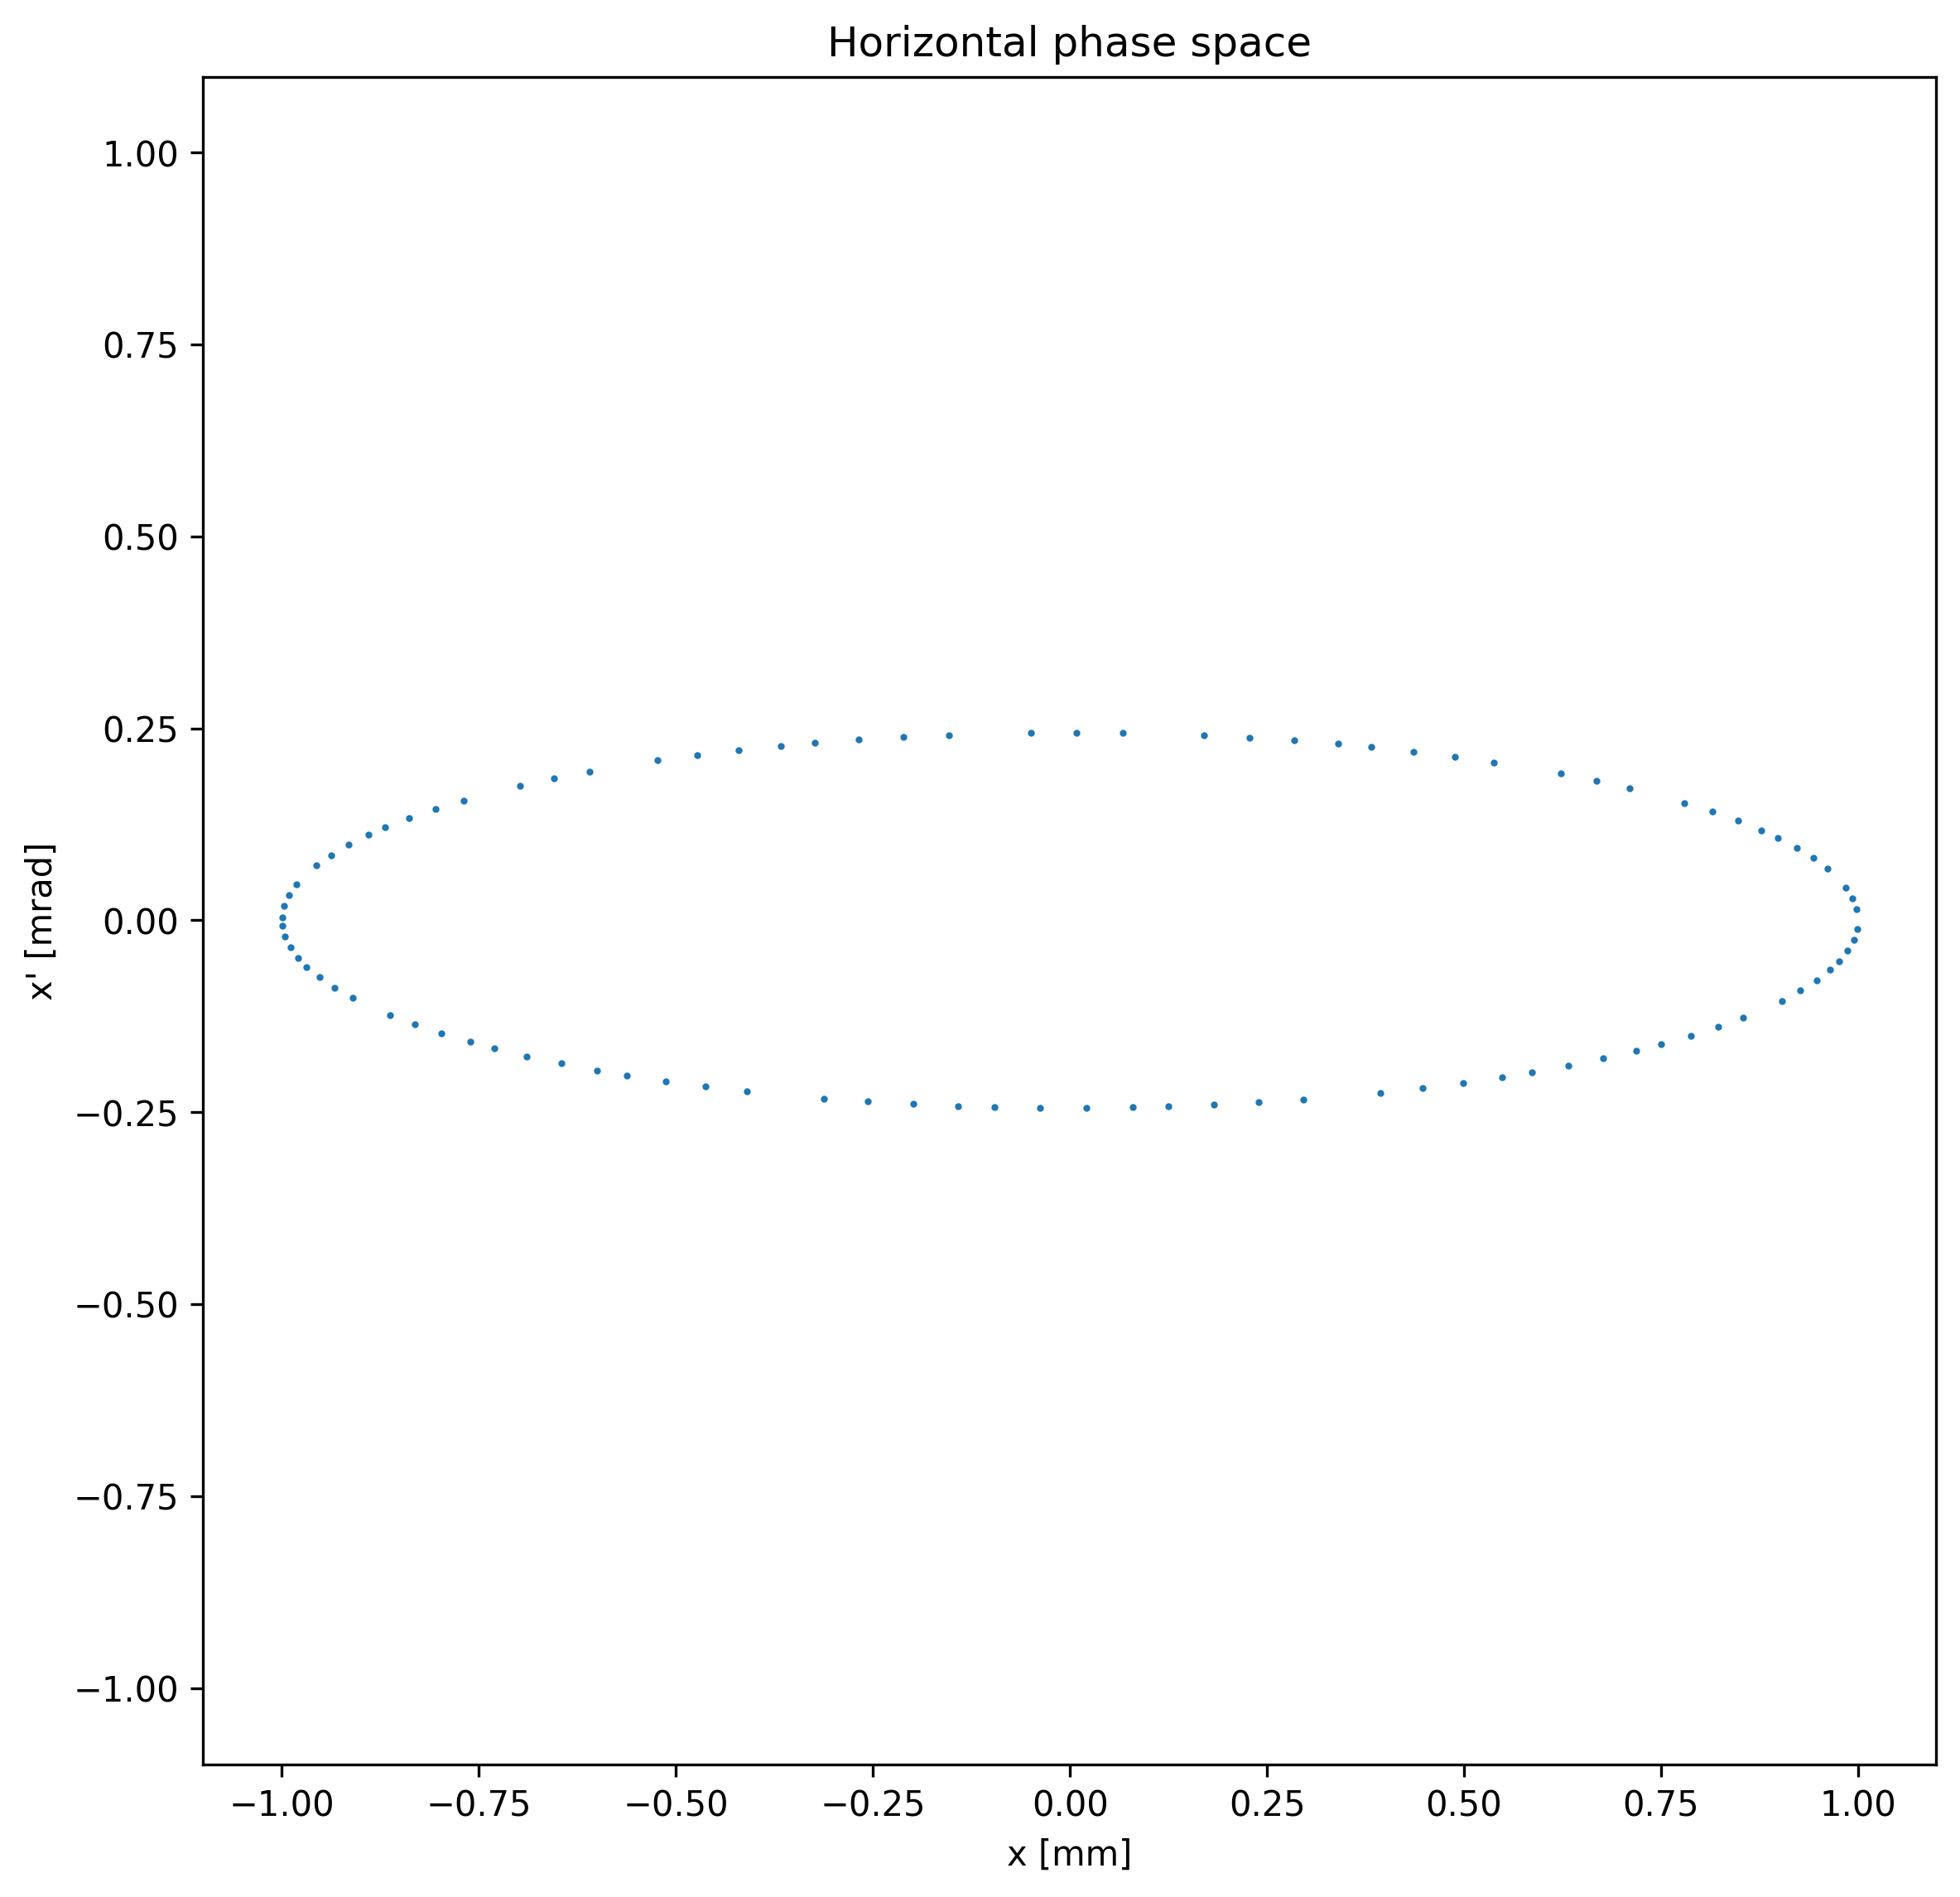

In [7]:
# Plot the horizontal phase space

fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
axis = fig.add_subplot(111)

# TODO: plot
axis.set_title('Horizontal phase space')
plot_phase_space(axis,
                 states[:, 0],
                 states[:, 1], "x [mm]", "x' [mrad]")
plt.show()

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Plot the vertical phase space $(y, p_y)$</li>
        </ul>
    </div>
</html>

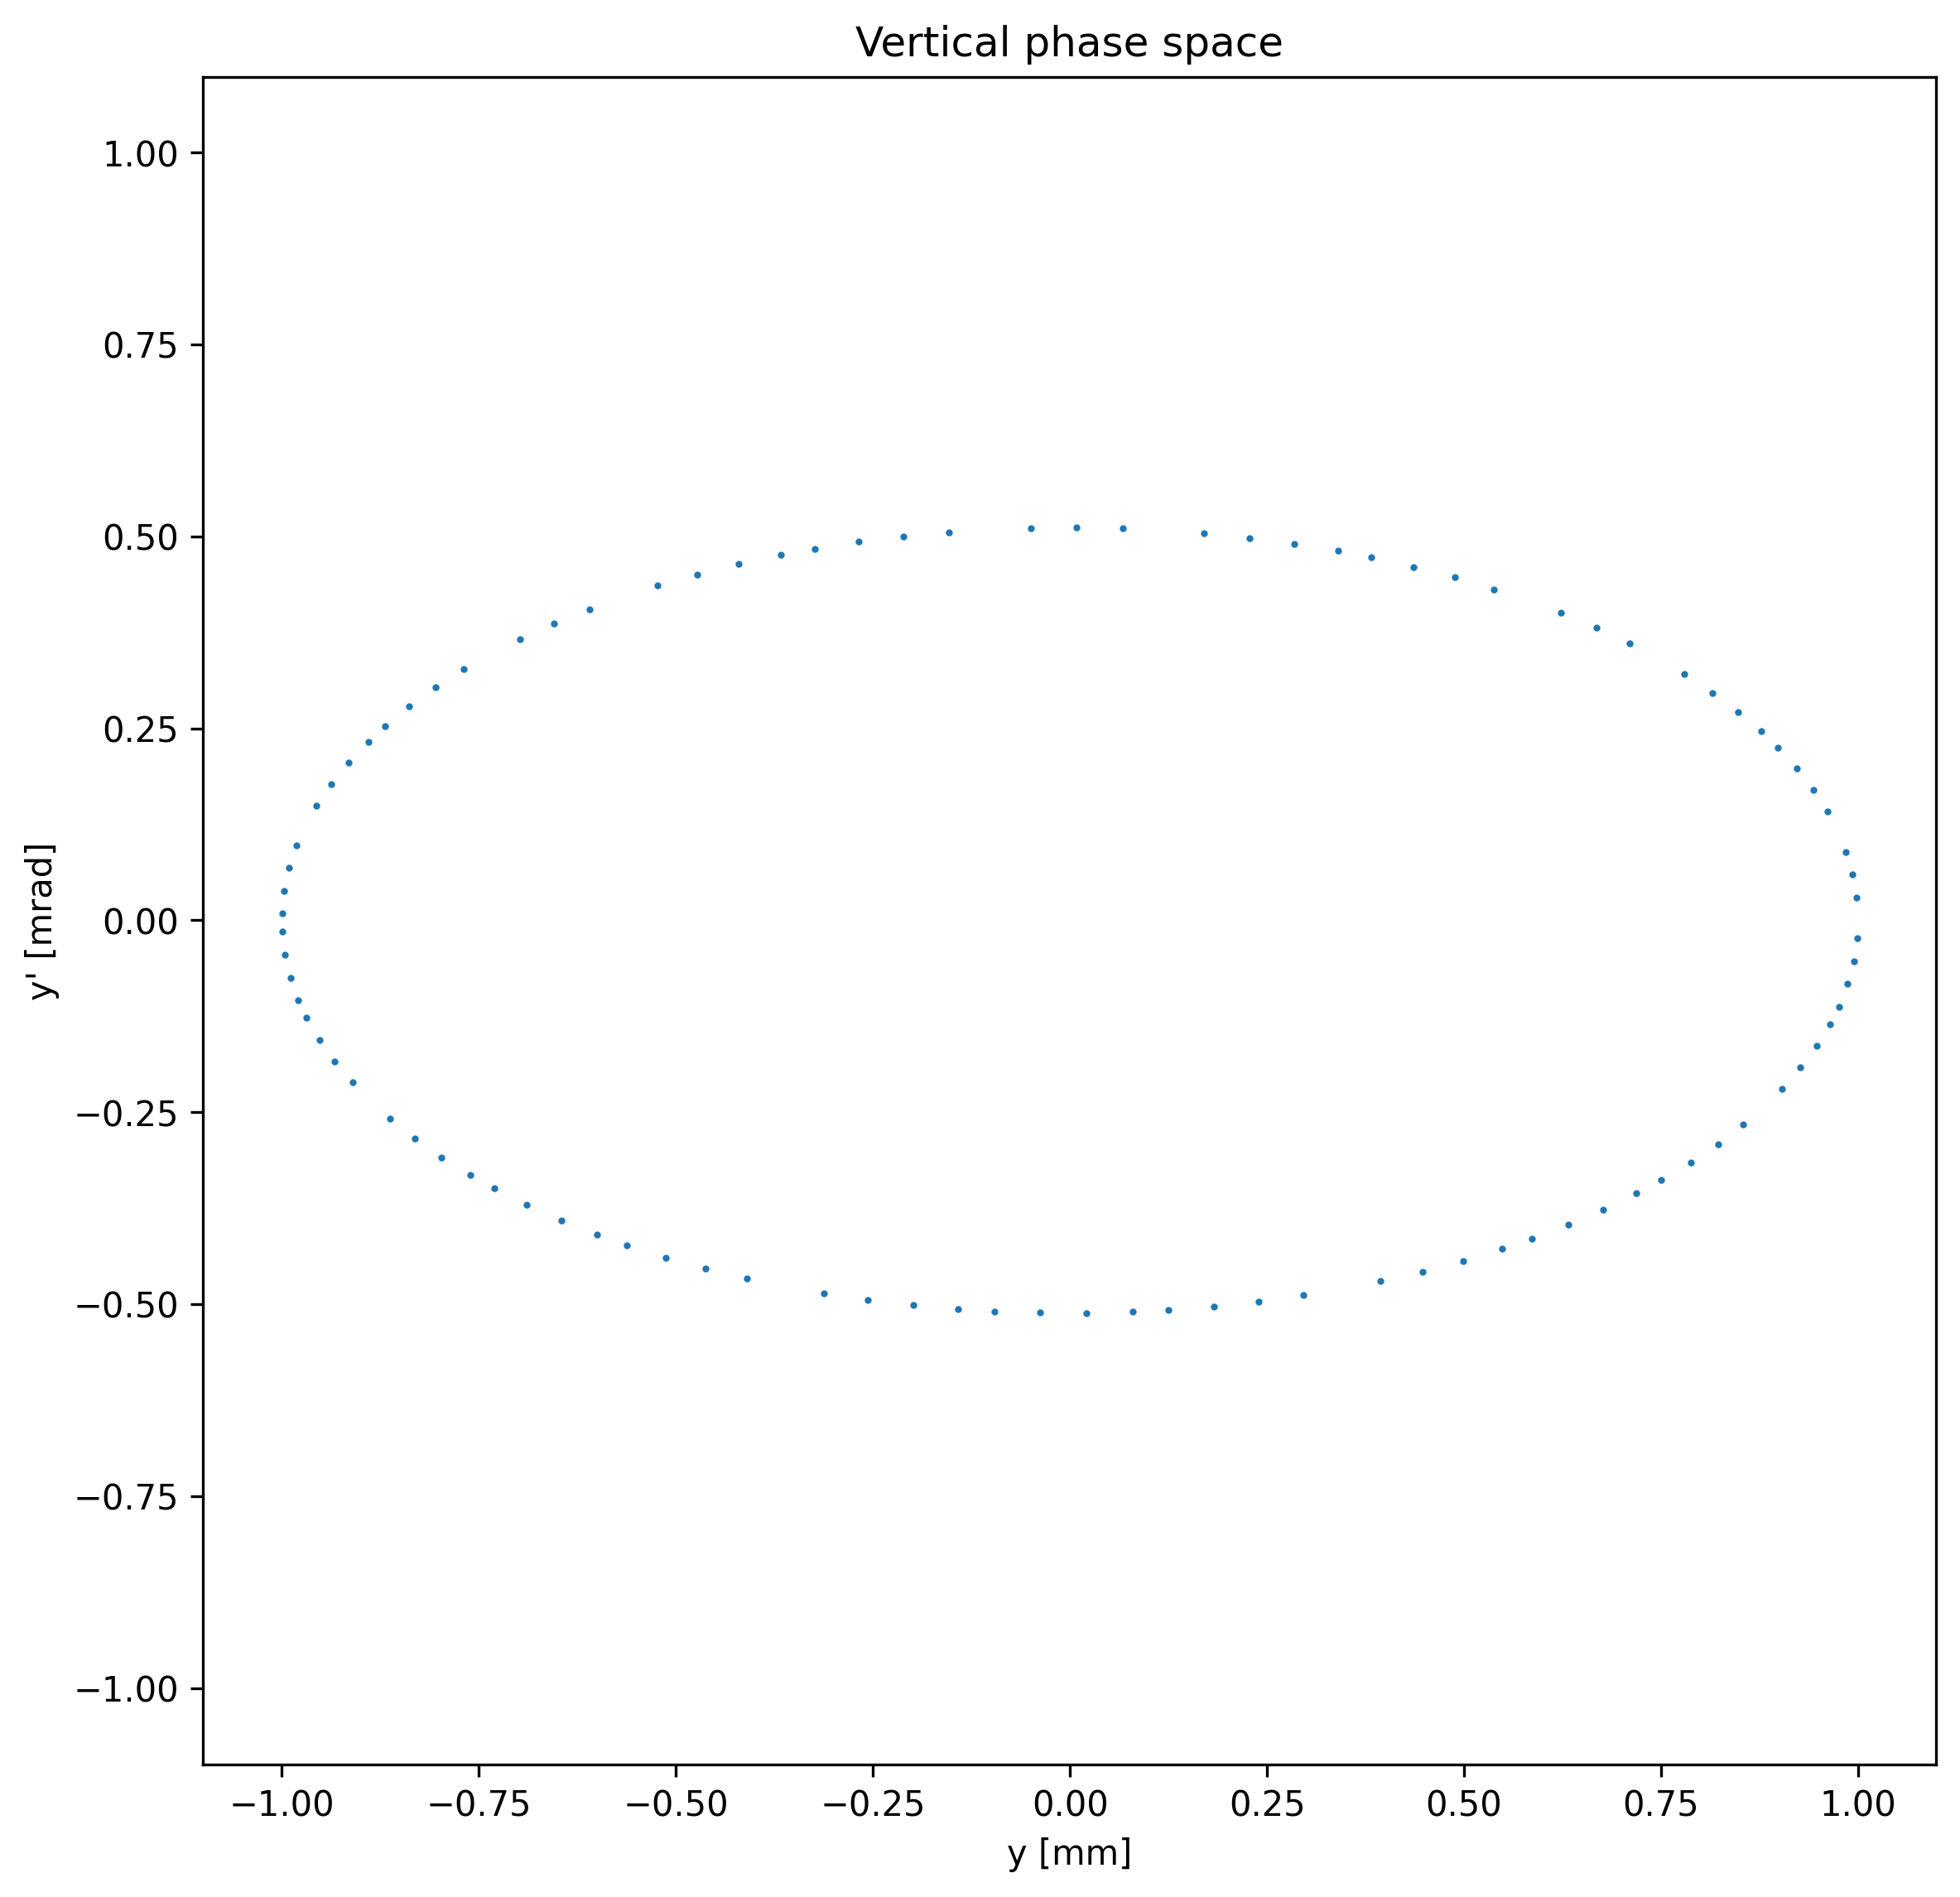

In [8]:
# Plot the vertical phase space
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
axis = fig.add_subplot(111)

# TODO: plot
axis.set_title('Vertical phase space')
plot_phase_space(axis,
                 states[:, 2],
                 states[:, 3], "y [mm]", "y' [mrad]")
plt.show()

## Twiss parameter tracking
You already learnt that we can characterise the beamline by so called Twiss parameters ($\alpha$, $\beta$, $\gamma$).
As given in page 28 of `pam-s6-2.pdf` (equivalently also given in page 67 of `pam-s5.pdf`), for $u=x$ or $y$, we're able to propagate the Twiss parameters through a transfer matrix by
\begin{equation}
J_u(s_1) = M_u(s_0, s_1)\cdot J_u(s_0)\cdot M_u^T(s_0, s_1),
\end{equation}
where
\begin{equation}
J_x(s) = 
\begin{pmatrix}
\beta_x(s) & -\alpha_x(s)\\
-\alpha_x(s) & \gamma_x(s)
\end{pmatrix},
J_y(s) = 
\begin{pmatrix}
\beta_y(s) & -\alpha_y(s)\\
-\alpha_y(s) & \gamma_y(s)
\end{pmatrix}
\end{equation}
and $M_x$, $M_y$ are the $2\times2$ sub-matrices of the $6\times6$ transfer matrix $M$. We also know that
\begin{equation}
\gamma_x = \frac{1+\alpha_x^2}{\beta_x}, \gamma_y = \frac{1+\alpha_y^2}{\beta_y}
\end{equation}
We now track the Twiss parameters. We still have length $L=1\ m$ and focal length $f_0 = \sqrt{2}\ m$.
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Calculate the initial Twiss parameters $\alpha_{x0}, \beta_{x0}, \alpha_{y0}, \beta_{y0}$ at the starting point of the FODO cell. You only need to write the normalization of $P$. </li>
        </ul>
    </div>
</html>

# From Lecture 6-2 we know that
$$M_{OTM} = PD(\mu)P^{-1}$$
where $M_{OTM}$ is the 2x2 matrix of one turn map (here our FODO cell map), $D$ is the diagonal matrix of the eigenvalues, and P is the matrix composed of all eigenvectors. We also have
$$P[0,0]=\sqrt{\frac{\beta}{2}}$$
$$P[1,0]=\frac{-\alpha+i}{\sqrt{2\beta}}$$
where $\alpha, \beta$ are the Twiss parameters at the starting point of a period. (P23 of lecture 6-2)

We can calculate like this
```python
import numpy as np
import np.linalg as la

M_OTM = ... # the FODO map
eigenvalues, P = la.eig(M_OTM) # get eigenvalues and P; P is before the normalization
P = ...  # normalize P such that la.det(P)=-1j
D = np.diag(eigenvalues) # compose D

# Compute beta and alpha
beta = np.real(P[0,0]**2*2)
alpha = -np.real(P[1,0]*np.sqrt(2*beta))
```

In [9]:
from numpy import linalg as la

def get_twiss_initial(M_OTM_2x2):
    eigenvalues, P = la.eig(M_OTM_2x2)
    P=P/((la.det(P)*1j)**(1/len(P))) # normalize P such that la.det(P)=-1j
    D=np.diag(eigenvalues)
    # Compute beta and alpha
    beta=np.real(P[0,0]**2*2)
    alpha=-np.real(P[1,0]*np.sqrt(2*beta))
    return alpha, beta

L = 1 # m
f0 = np.sqrt(2.0) # m

# M_OTM here is just the fodo cell map
M_cell = FODO(length=1, f=np.sqrt(2.0))

# for x plane
ax0, bx0 = get_twiss_initial(M_OTM_2x2=M_cell[0:2,0:2])
print ('alpha_x0   =', ax0)
print ('beta_x0    =', bx0)
# calculate gamma
gx0 = (1 + ax0**2) / bx0
# for y plane
ay0, by0 = get_twiss_initial(M_OTM_2x2=M_cell[2:4,2:4])
print ('alpha_y0   =', ay0)
print ('beta_y0    =', by0)
# calculate gamma
gy0 = (1 + ay0**2) / by0

alpha_x0   = -0.0
beta_x0    = 4.092760751723516
alpha_y0   = -0.0
beta_y0    = 1.9546708164241204


<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Compare the above results with the following relation on page 81-82 in pam-s5.pdf:
            $$
                \begin{align*}
                \alpha_x &= 0, \quad
                \beta_x = \frac{2f_0(2f_0+L)}{\sqrt{4f_0^2-L^2}}\\
                \alpha_y &= 0,\quad
                \beta_y = \frac{2f_0(2f_0-L)}{\sqrt{4f_0^2-L^2}}
                \end{align*}
            $$
            </li>
        </ul>
    </div>
</html>

In [10]:
# TODO
ax0_new = 0
bx0_new = 2.0 * f0 * (2.0 * f0 + L) / np.sqrt(4.0 * f0**2 - L**2)

ay0_new = 0
by0_new = 2.0 * f0 * (2.0 * f0 - L) / np.sqrt(4.0 * f0**2 - L**2)

In [11]:
print(ax0_new, bx0_new, ay0_new, by0_new)

0 4.092760751723516 0 1.9546708164241207


You should get the same results as above. Note that in ```Map.py```, we define the transpose of the matrix as a property/attibute. You can directly call `M.T` to get the transpose of the transfer matrix of the element.
```Python
def getT(self):
        """
        Returns the transpose of the matrix.
        
        Does *not* conjugate!
        """
        return self.R.T
    
# makes m.T possible
T = property(getT, None)
```

### One Cell
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Track the Twiss</li>
            <li>Collect every state</li>
        </ul>
    </div>
</html>

In [12]:
# initial container of the twiss parameters
twiss = [[ax0, bx0, gx0, ay0, by0, gy0]]
# number of elements in one cell
n_elements = 5

RQ1 = ThinQuadrupole(2.0 * f0) # for half a quadrupole, the focal length is twice that for a full quadrupole
RD  = Drift(L)
RQ2 = ThinQuadrupole(-f0) # vertically focusing quadrupole

s = [0, # initial position
     0, # position after first half thin quadrupole
     L, # position after first drift
     L, # position after second thin quadrupole
     2*L, # position after second drift
     2*L] # position after third half thin quadrupole

Jx = np.matrix([[bx0, -ax0],
               [-ax0, gx0]]) # submatrix in x plane
Jy = np.matrix([[by0, -ay0],
               [-ay0, gy0]]) # submatrix in y plane

for M in [RQ1, RD, RQ2, RD, RQ1]:
    # TODO: propagate
    Mx = M[0:2, 0:2]
    My = M[2:4, 2:4]
    Jx = Mx * Jx * Mx.T
    Jy = My * Jy * My.T
    
    # TODO: extract Twiss from Jx and Jy
    # a_x, b_x, g_x,
    # a_y, b_y, g_y
    t = [-Jx[0,1], Jx[0,0], Jx[1,1],
         -Jy[0,1], Jy[0,0], Jy[1,1]]
    
    # collect all twiss
    twiss = np.append(twiss, t)
    
twiss = np.reshape(twiss, (n_elements+1, 6)) # initial twiss + 5 elements

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Plot $\beta_x$ and $\beta_y$. Use the positions $s$ as the x axis.</li>
        </ul>
    </div>
</html>

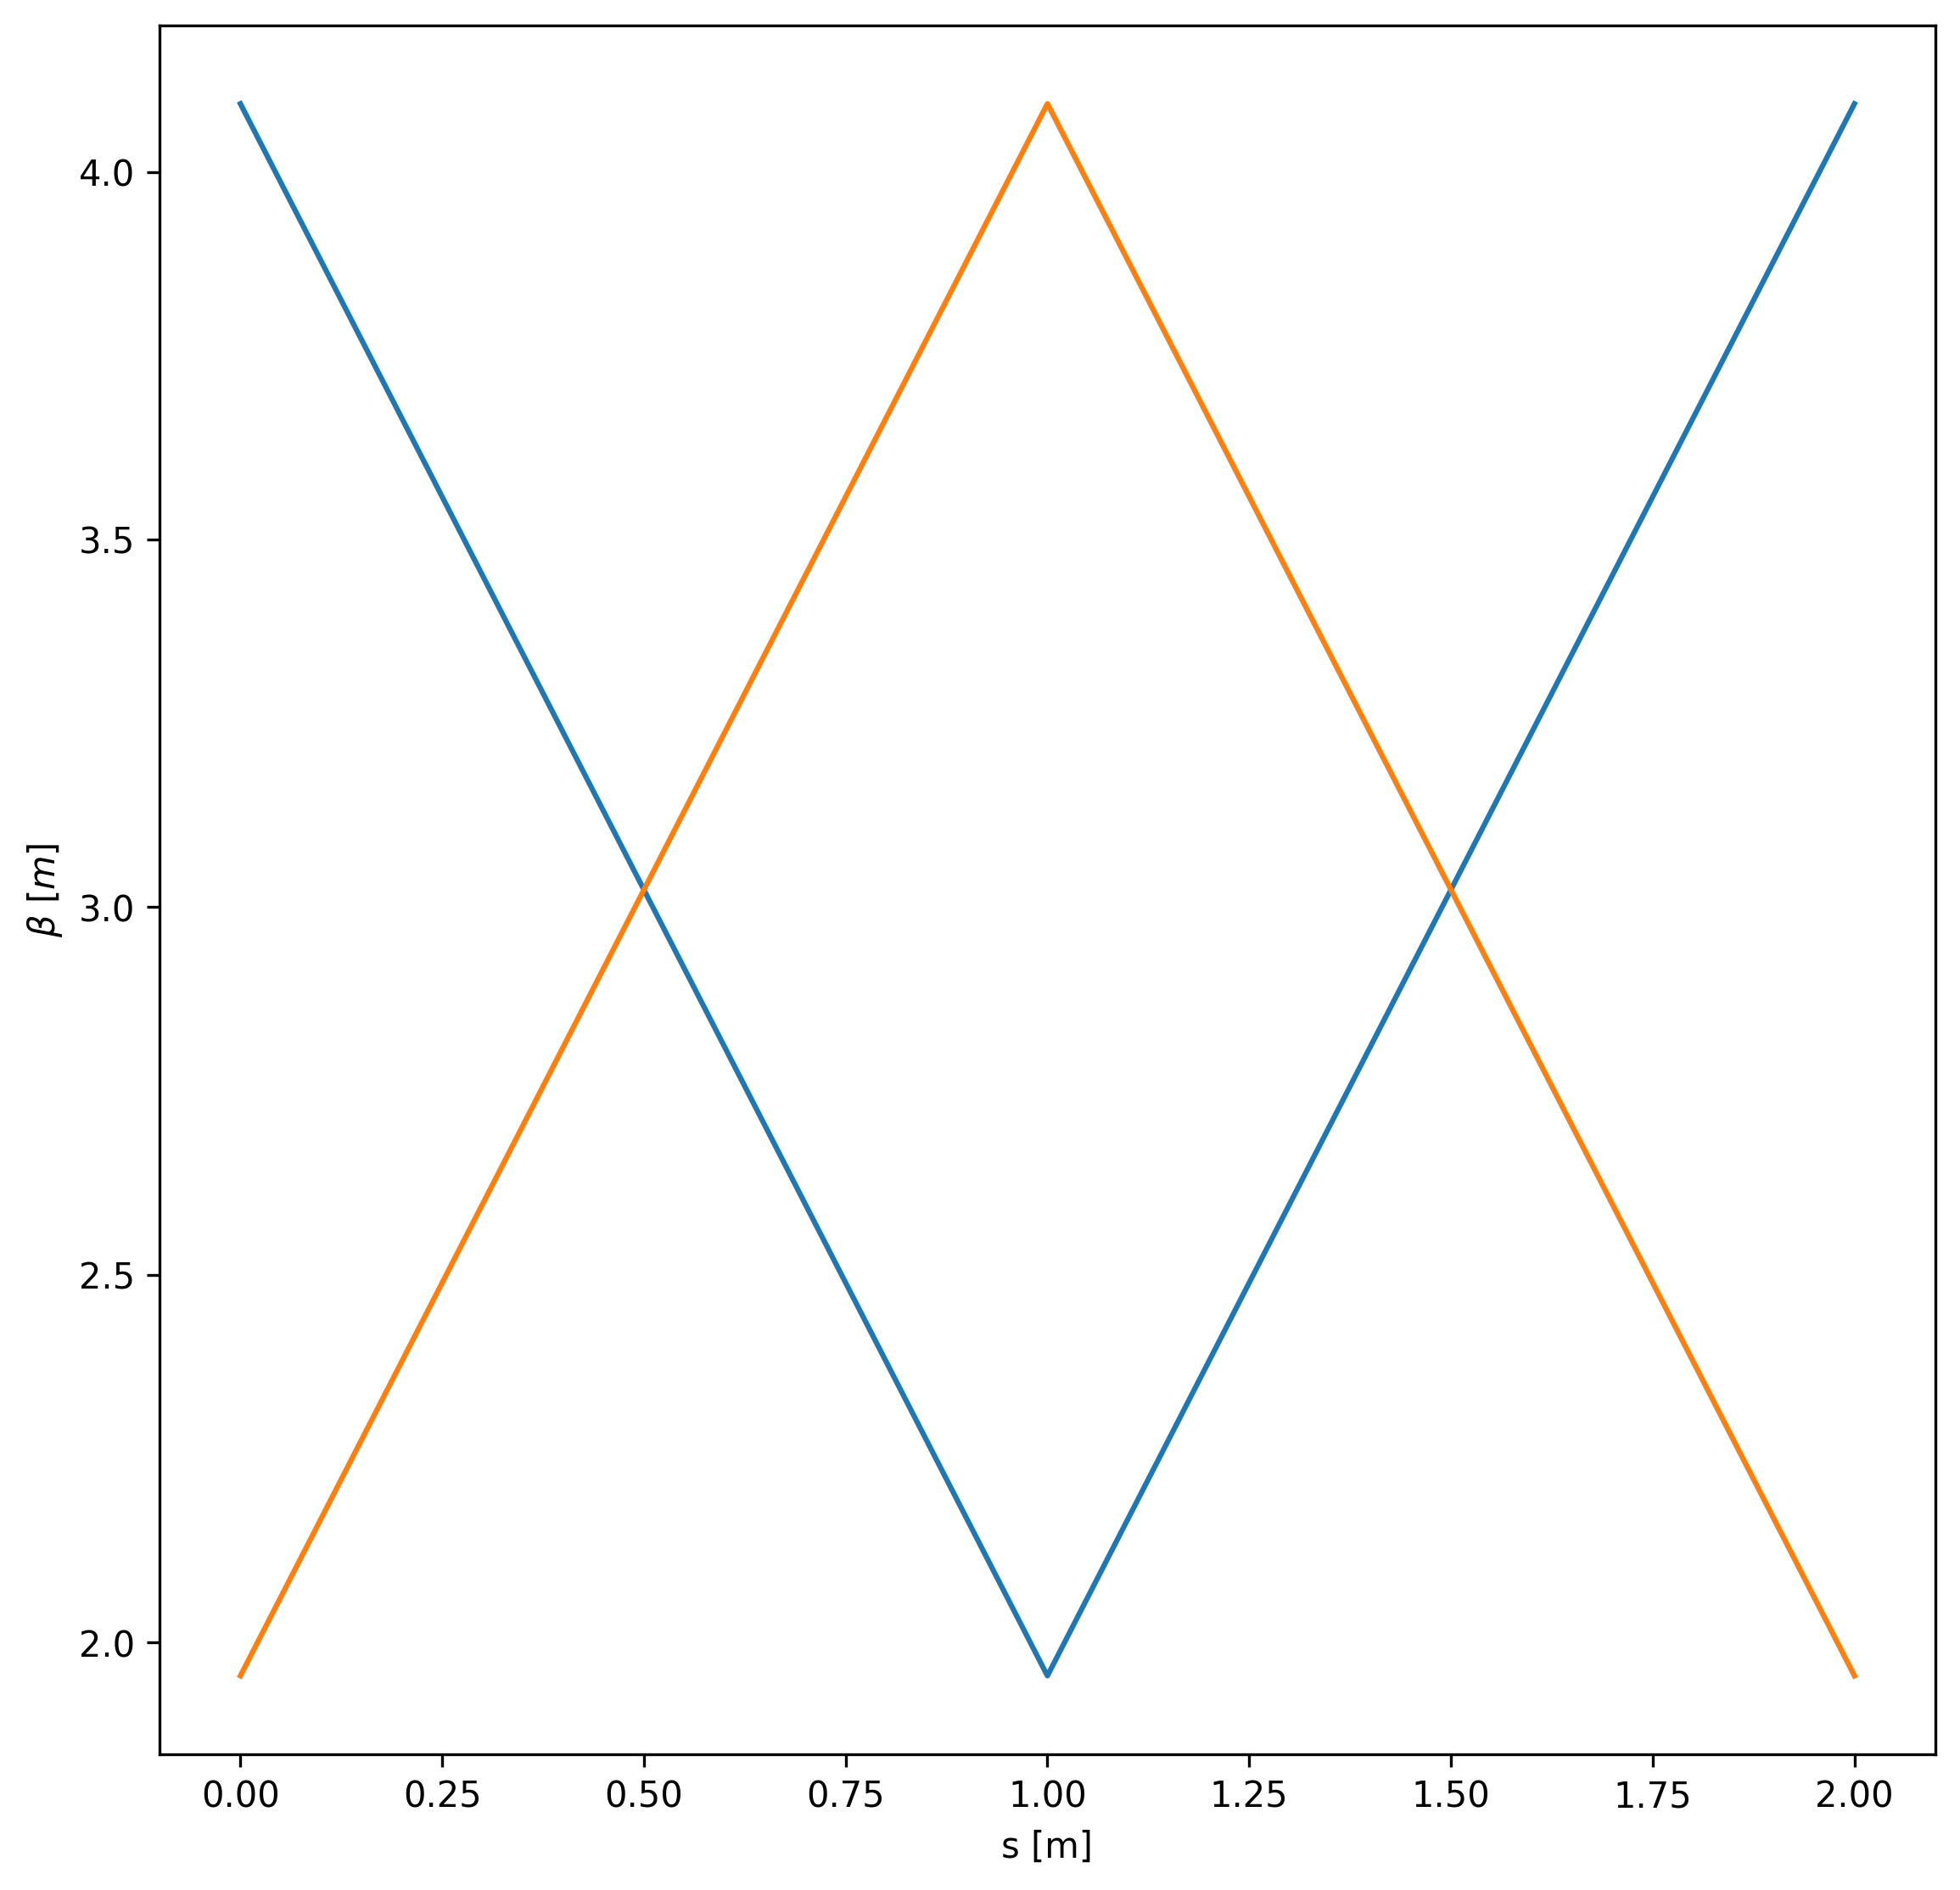

In [13]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
axis = fig.add_subplot(111)
axis.set_xlabel('s [m]')
axis.set_ylabel(r'$\beta\ [m]$')

# TODO: plot
axis.plot(s, twiss[:, 1], label=r'$\beta_x$')
axis.plot(s, twiss[:, 4], label=r'$\beta_y$')
plt.show()

### N Cells
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Track the Twiss through $n=3$ cells</li>
            <li>Collect every state</li>
        </ul>
    </div>
</html>

In [14]:
# re-define
twiss = [[ax0, bx0, gx0, ay0, by0, gy0]]

Jx = np.matrix([[bx0, -ax0],
               [-ax0, gx0]])
Jy = np.matrix([[by0, -ay0],
               [-ay0, gy0]])

# number of elements in one cell
n_elements = 5
# number of cells
n_cells = 3

s = [0, ] # initial position

for i in range(0, n_cells):
    
    s = s + [2*L*i, # position after first half thin quadrupole
             2*L*i+L, # position after first drift
             2*L*i+L, # position after second thin quadrupole
             2*L*i+2*L, # position after second drift
             2*L*i+2*L] # position after third half thin quadrupole
    
    for M in [RQ1, RD, RQ2, RD, RQ1]:
        # TODO: propagate
        Mx = M[0:2, 0:2]
        My = M[2:4, 2:4]
        Jx = Mx * Jx * Mx.T
        Jy = My * Jy * My.T
    
        # TODO: extract Twiss from Jx and Jy
        # a_x, b_x, g_x,
        # a_y, b_y, g_y
        t = [-Jx[0,1], Jx[0,0], Jx[1,1],
             -Jy[0,1], Jy[0,0], Jy[1,1]]
    
        # collect all twiss
        twiss = np.append(twiss, t)
    
twiss = np.reshape(twiss, (n_cells*n_elements+1, 6)) # initial + n_cell*n_elements

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Plot $\beta_x$ and $\beta_y$. Use the positions $s$ as the x axis.</li>
        </ul>
    </div>
</html>

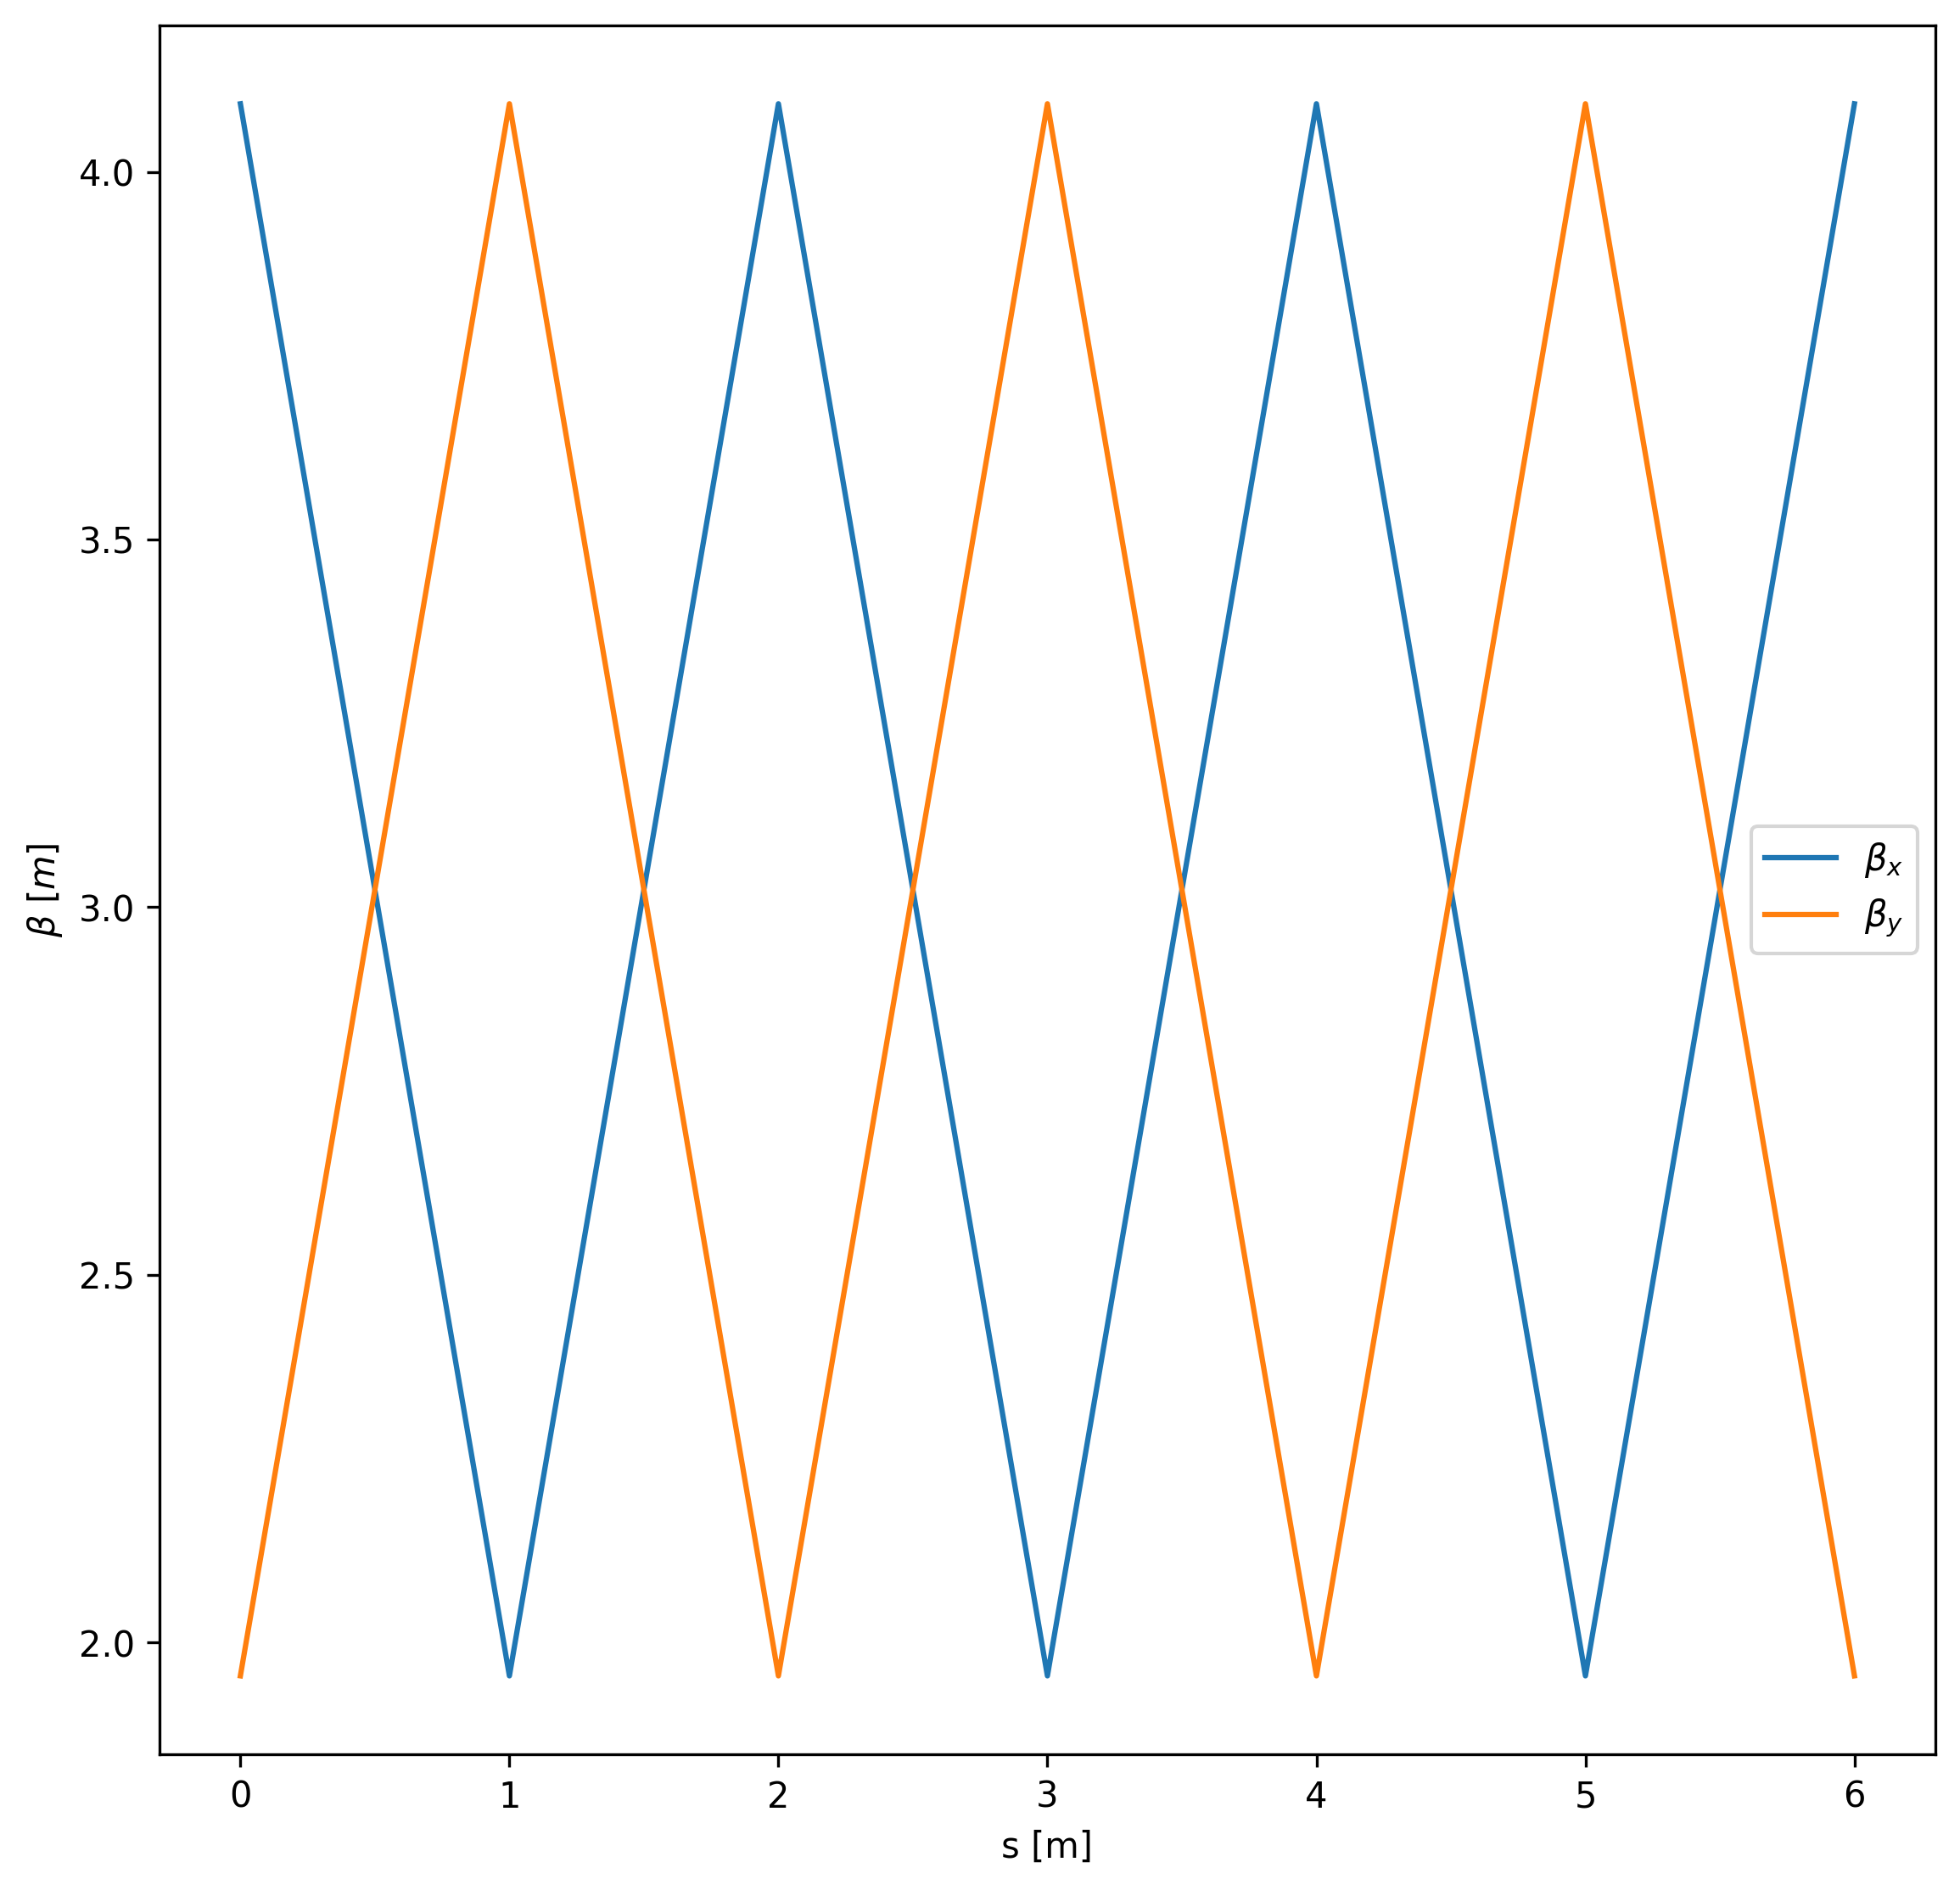

In [15]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
axis = fig.add_subplot(111)
axis.set_xlabel('s [m]')
axis.set_ylabel(r'$\beta\ [m]$')

# TODO: plot
axis.plot(s, twiss[:, 1], label=r'$\beta_x$')
axis.plot(s, twiss[:, 4], label=r'$\beta_y$')
axis.legend()

plt.show()

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Plot $\alpha_x$ and $\alpha_y$. Use the positions $s$ as the x axis.</li>
        </ul>
    </div>
</html>

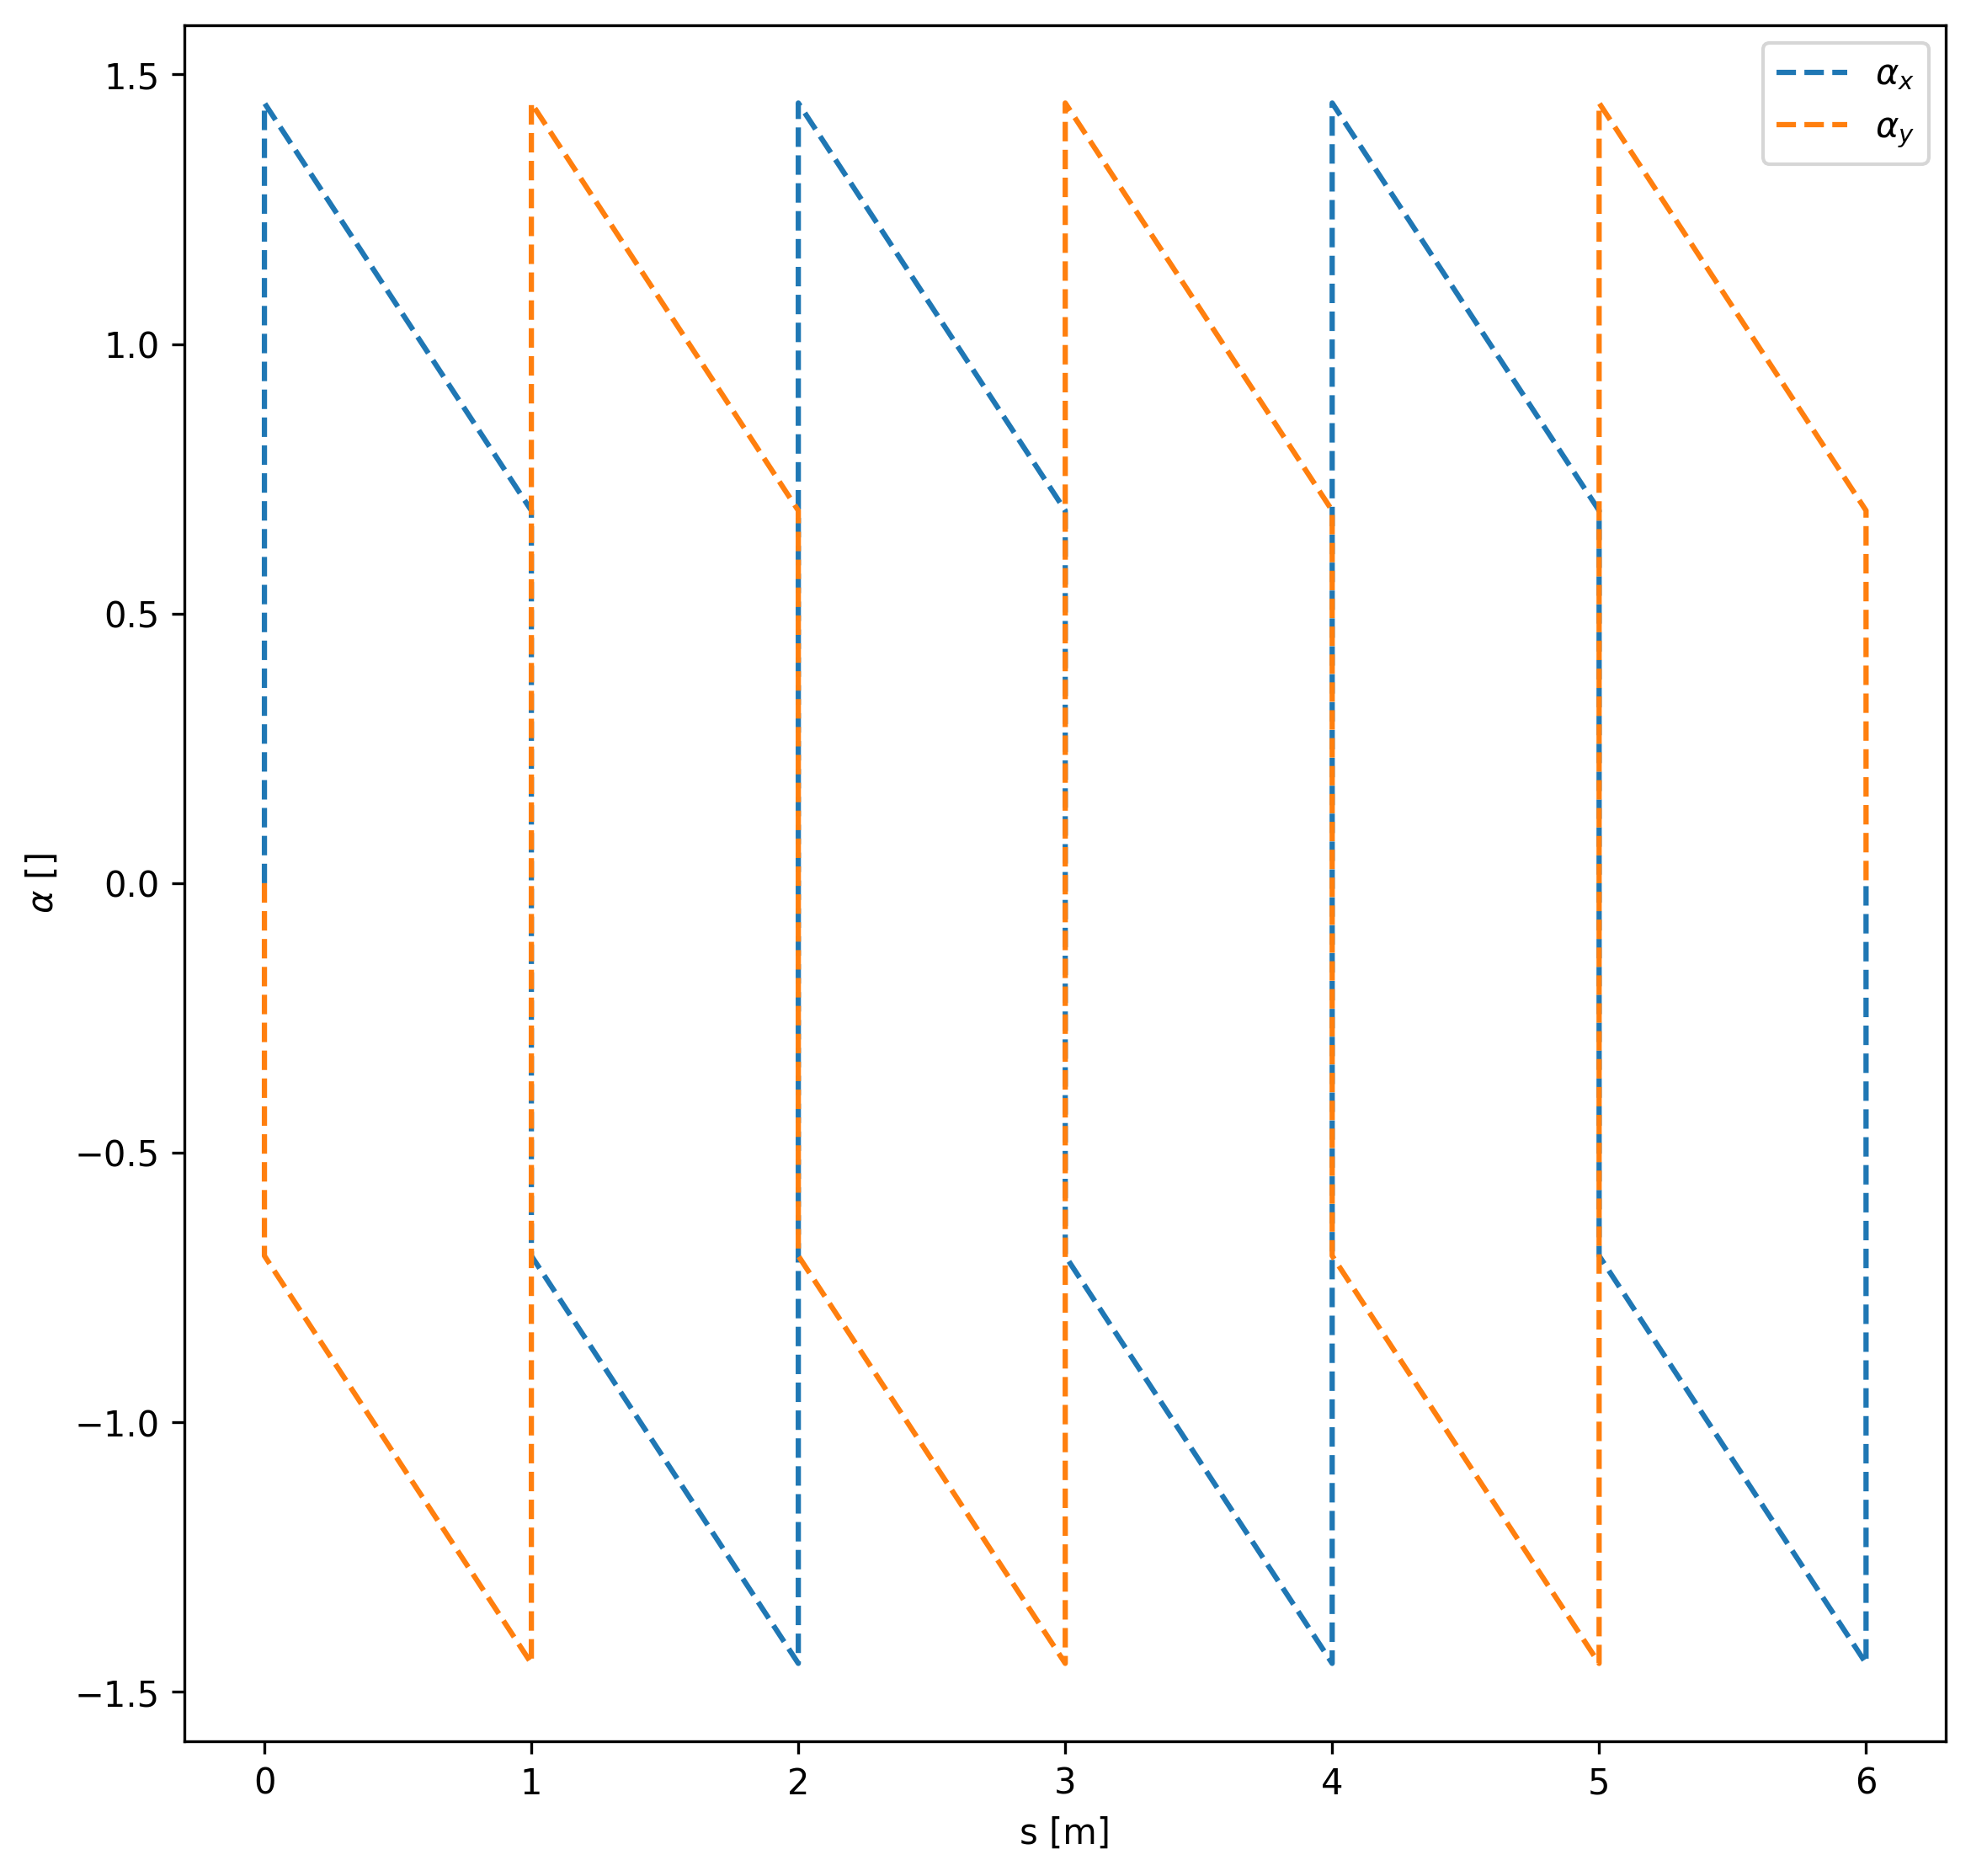

In [16]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
axis = fig.add_subplot(111)
axis.set_xlabel('s [m]')
axis.set_ylabel(r'$\alpha\ [ ]$')

# TODO: plot
axis.plot(s, twiss[:, 0], label=r'$\alpha_x$', linestyle='--')
axis.plot(s, twiss[:, 3], label=r'$\alpha_y$', linestyle='--')
axis.legend()

plt.show()

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Plot $\gamma_x$ and $\gamma_y$. Use the positions $s$ as the x axis.</li>
        </ul>
    </div>
</html>

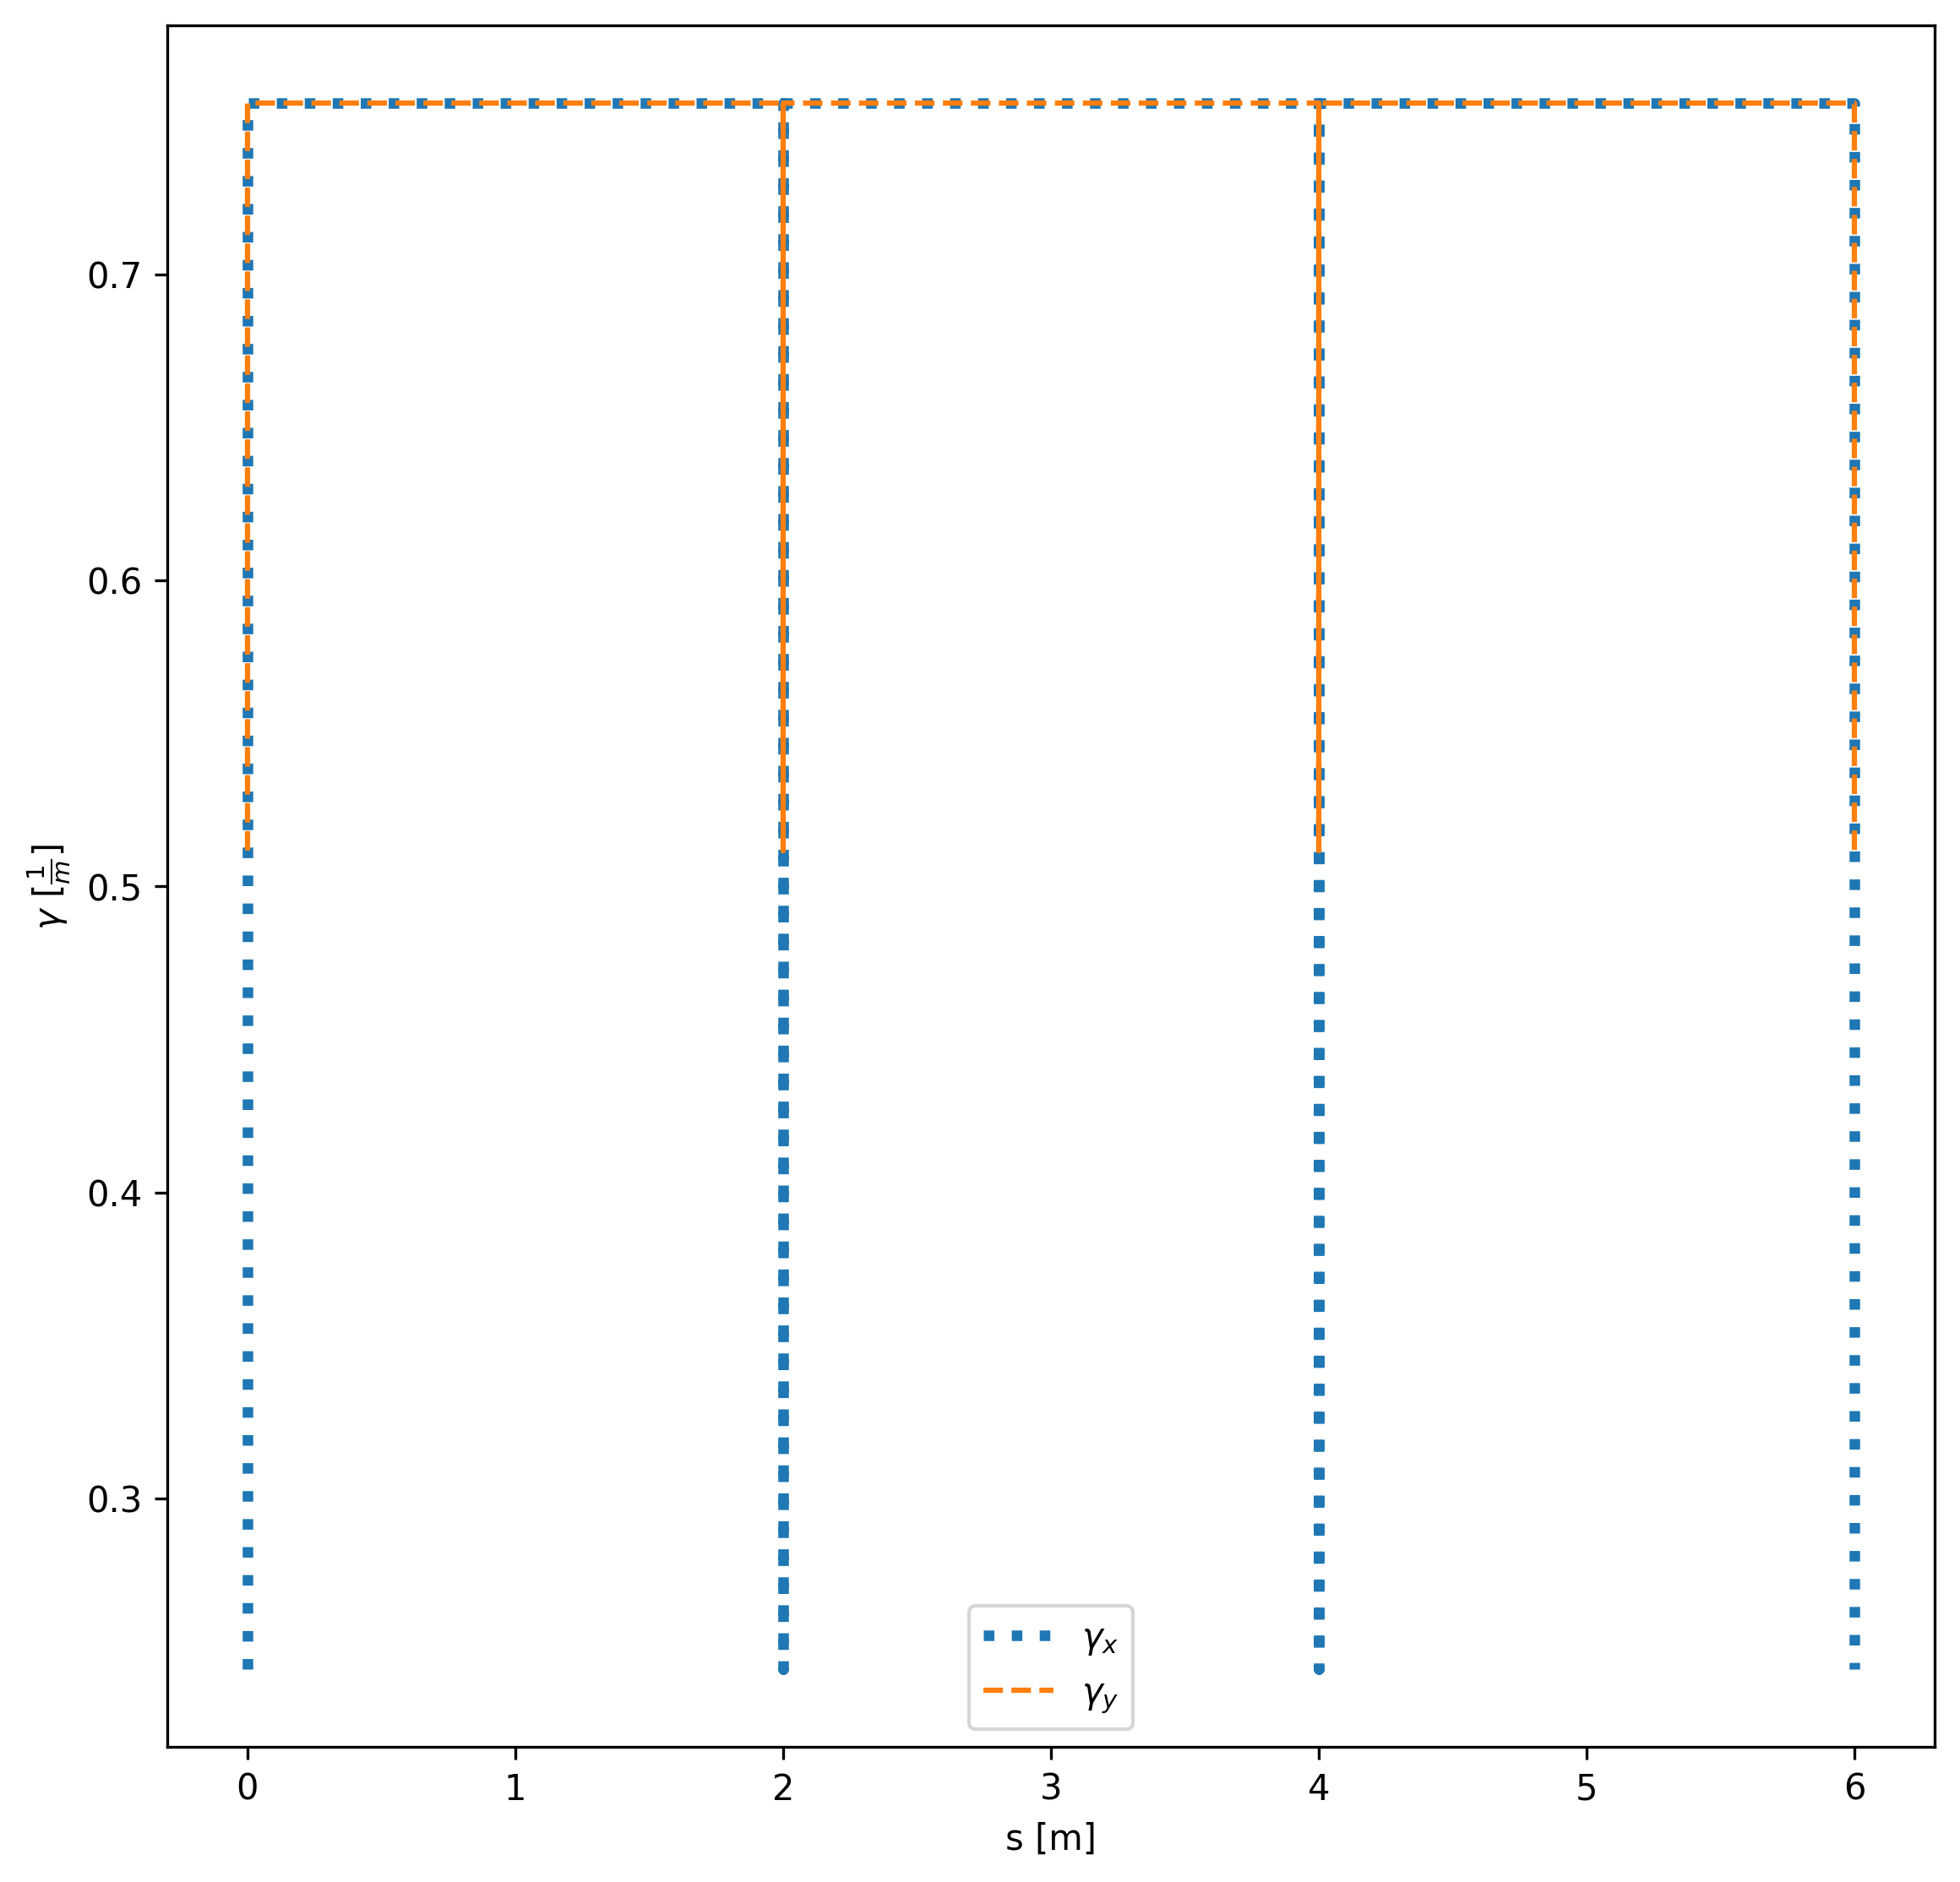

In [17]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
axis = fig.add_subplot(111)
axis.set_xlabel('s [m]')
axis.set_ylabel(r'$\gamma\ [\frac{1}{m}]$')

# TODO: plot
axis.plot(s, twiss[:, 2], label=r'$\gamma_x$', linestyle=':', linewidth=3)
axis.plot(s, twiss[:, 5], label=r'$\gamma_y$', linestyle='--')
axis.legend()

plt.show()